In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy

from pylab import rcParams
rcParams['figure.figsize'] = 30, 15

In [2]:
def canny_edge_detection(input):
    
    input = input.astype('uint8')

    # Using OTSU thresholding - bimodal image
    otsu_threshold_val, ret_matrix = cv2.threshold(input,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    lower_threshold = otsu_threshold_val * 0.4
    upper_threshold = otsu_threshold_val * 1.3
#     print(lower_threshold,upper_threshold)
    edges = cv2.Canny(input, lower_threshold, upper_threshold)
    return edges

In [3]:
def HoughCircles(input_img,radius): 
    
    rows = input_img.shape[0] 
    cols = input_img.shape[1] 
    circles = []
    
    # initializing the angles to be computed 
    sinang = dict() 
    cosang = dict() 
    
    # initializing the angles  
    for angle in range(0,360): 
        sinang[angle] = np.sin(angle * np.pi/180) 
        cosang[angle] = np.cos(angle * np.pi/180) 
               
    # Initial threshold value 
    threshold = 150 
        
    #Initializing an empty 2D array with zeroes 
    acc_cells = np.full((rows,cols),fill_value=0,dtype=np.uint64)

    # Iterating through the original image 
    for x in range(rows): 
        for y in range(cols): 
            if input_img[x][y] == 255: # edge 
                # increment in the accumulator cells 
                for angle in range(0,360): 
                    b = y - round(radius * sinang[angle]) 
                    a = x - round(radius * cosang[angle]) 
                    if a >= 0 and a < rows and b >= 0 and b < cols: 
                        acc_cells[int(a)][int(b)] += 1
                        
    acc_cell_max = np.amax(acc_cells)
#     plt.imshow(acc_cells)
    bcc_cells = deepcopy(acc_cells)


    if(acc_cell_max > threshold):  
        # Remove below threshold
        acc_cells[acc_cells < threshold] = 0  

        for i in range(rows): 
            for j in range(cols): 
                if(i > 0 and j > 0 and i < rows-1 and j < cols-1 and acc_cells[i][j] >= threshold):
                    # averaging near neighbouring cells
                    avg_sum = np.float32((acc_cells[i][j]+acc_cells[i-1][j]+acc_cells[i+1][j]+acc_cells[i][j-1]+acc_cells[i][j+1]+acc_cells[i-1][j-1]+acc_cells[i-1][j+1]+acc_cells[i+1][j-1]+acc_cells[i+1][j+1])/9) 
                    if(avg_sum >= 33):
                        circles.append((i,j,radius))
                        acc_cells[i:i+5,j:j+7] = 0
    
    return circles,bcc_cells
                 

In [4]:
img_path = 'input.png'
orig_img = cv2.imread(img_path)

# Reading the input image and converting to gray scale
input_org = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
input_img = deepcopy(input_org)

# Denoise 
smoothed_img = cv2.fastNlMeansDenoising(input_org, None, 9, 13)

# Detect Edges using Canny Edge Detector
edged_image = canny_edge_detection(smoothed_img)

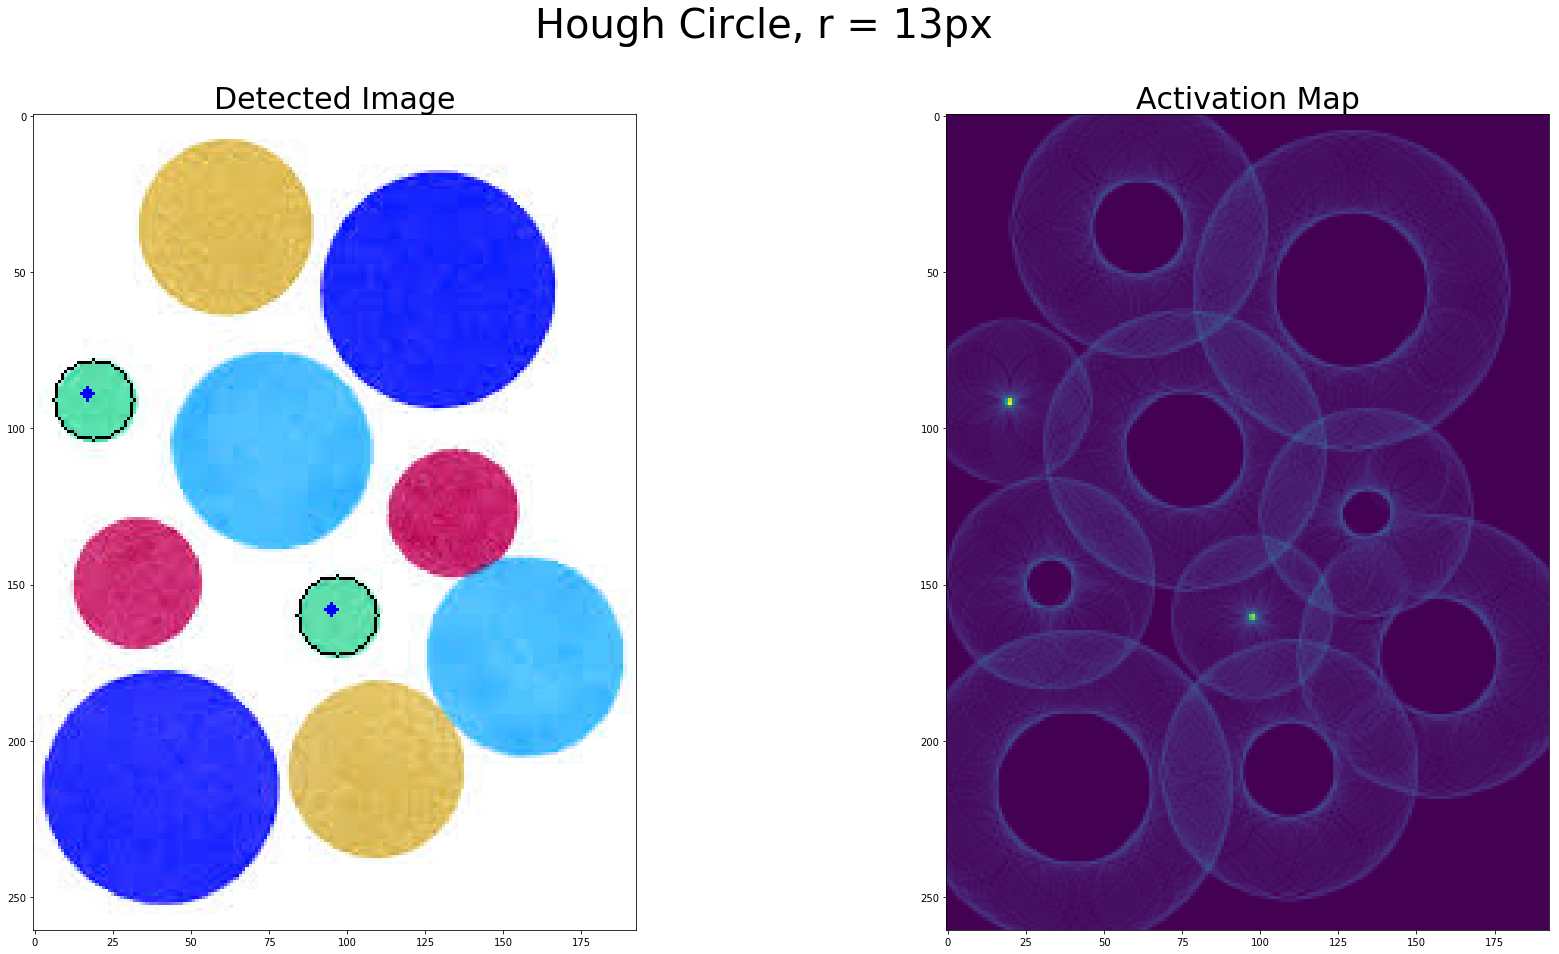

In [7]:
circles, activation = HoughCircles(edged_image,13)  

# Print the output
for vertex in circles:
    cv2.circle(orig_img,(vertex[1],vertex[0]),vertex[2],(0,0,0),1)
    cv2.rectangle(orig_img,(vertex[1]-2,vertex[0]-2),(vertex[1]-2,vertex[0]-2),(0,0,255),3)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Hough Circle, r = 13px', fontsize=40)
ax1.set_title('Detected Image', fontsize=30)
im1 = ax1.imshow(orig_img)
ax2.set_title('Activation Map', fontsize=30)
im2 = ax2.imshow(activation)
plt.show()

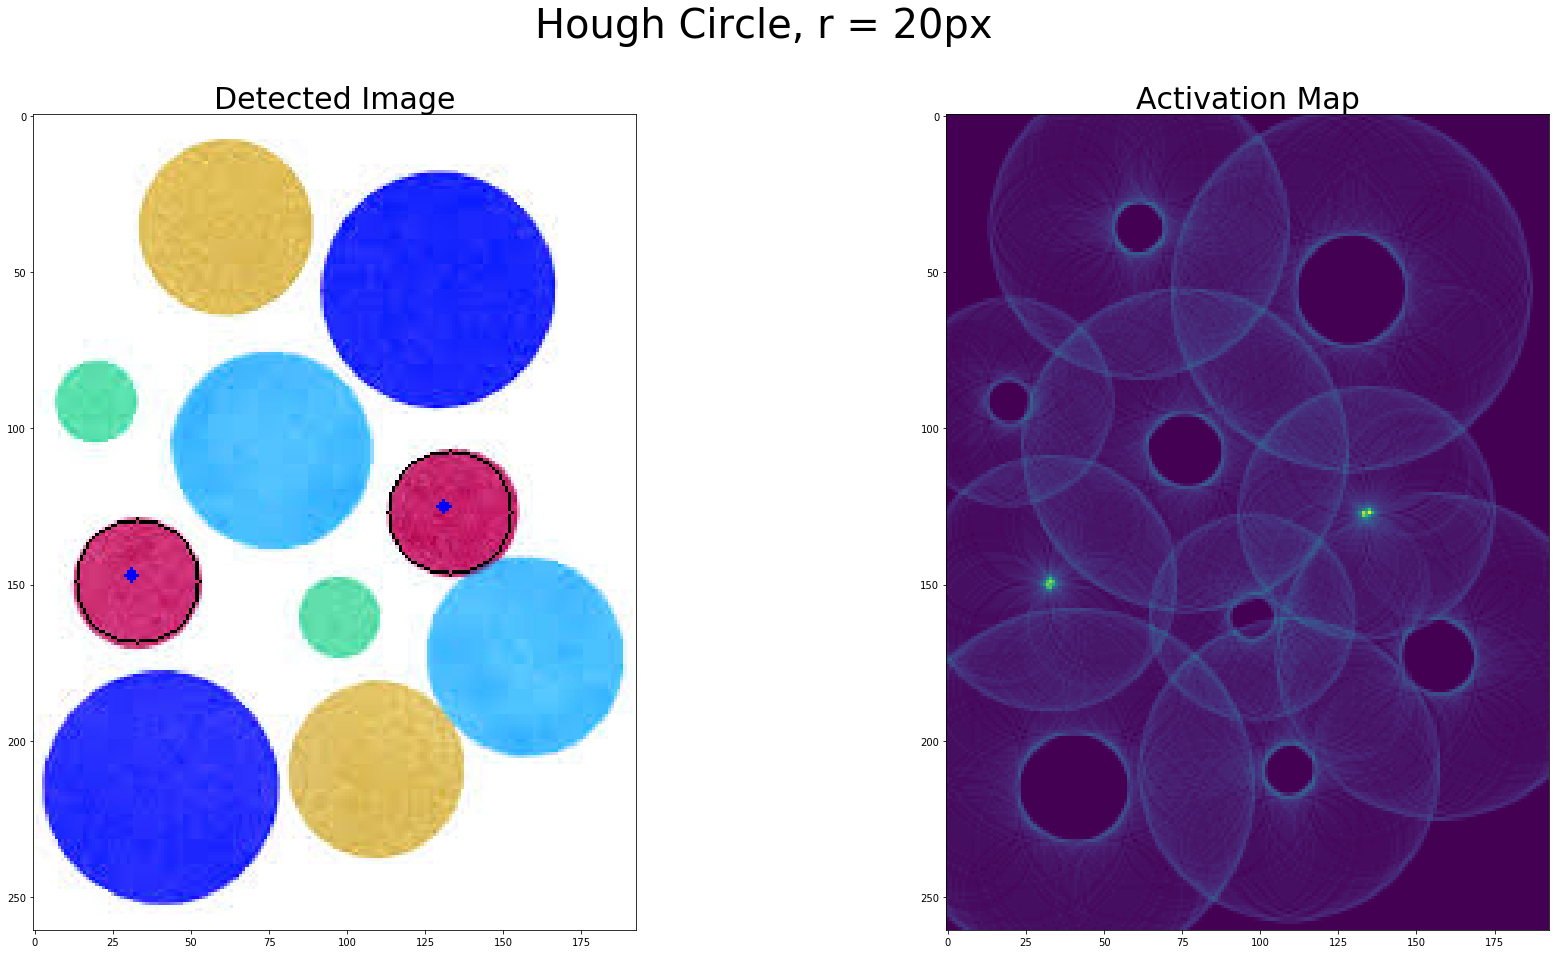

In [54]:
circles, activation = HoughCircles(edged_image,20)  

# Print the output
for vertex in circles:
    cv2.circle(orig_img,(vertex[1],vertex[0]),vertex[2],(0,0,0),1)
    cv2.rectangle(orig_img,(vertex[1]-2,vertex[0]-2),(vertex[1]-2,vertex[0]-2),(0,0,255),3)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Hough Circle, r = 20px', fontsize=40)
ax1.set_title('Detected Image', fontsize=30)
im1 = ax1.imshow(orig_img)
ax2.set_title('Activation Map', fontsize=30)
im2 = ax2.imshow(activation)
plt.show()

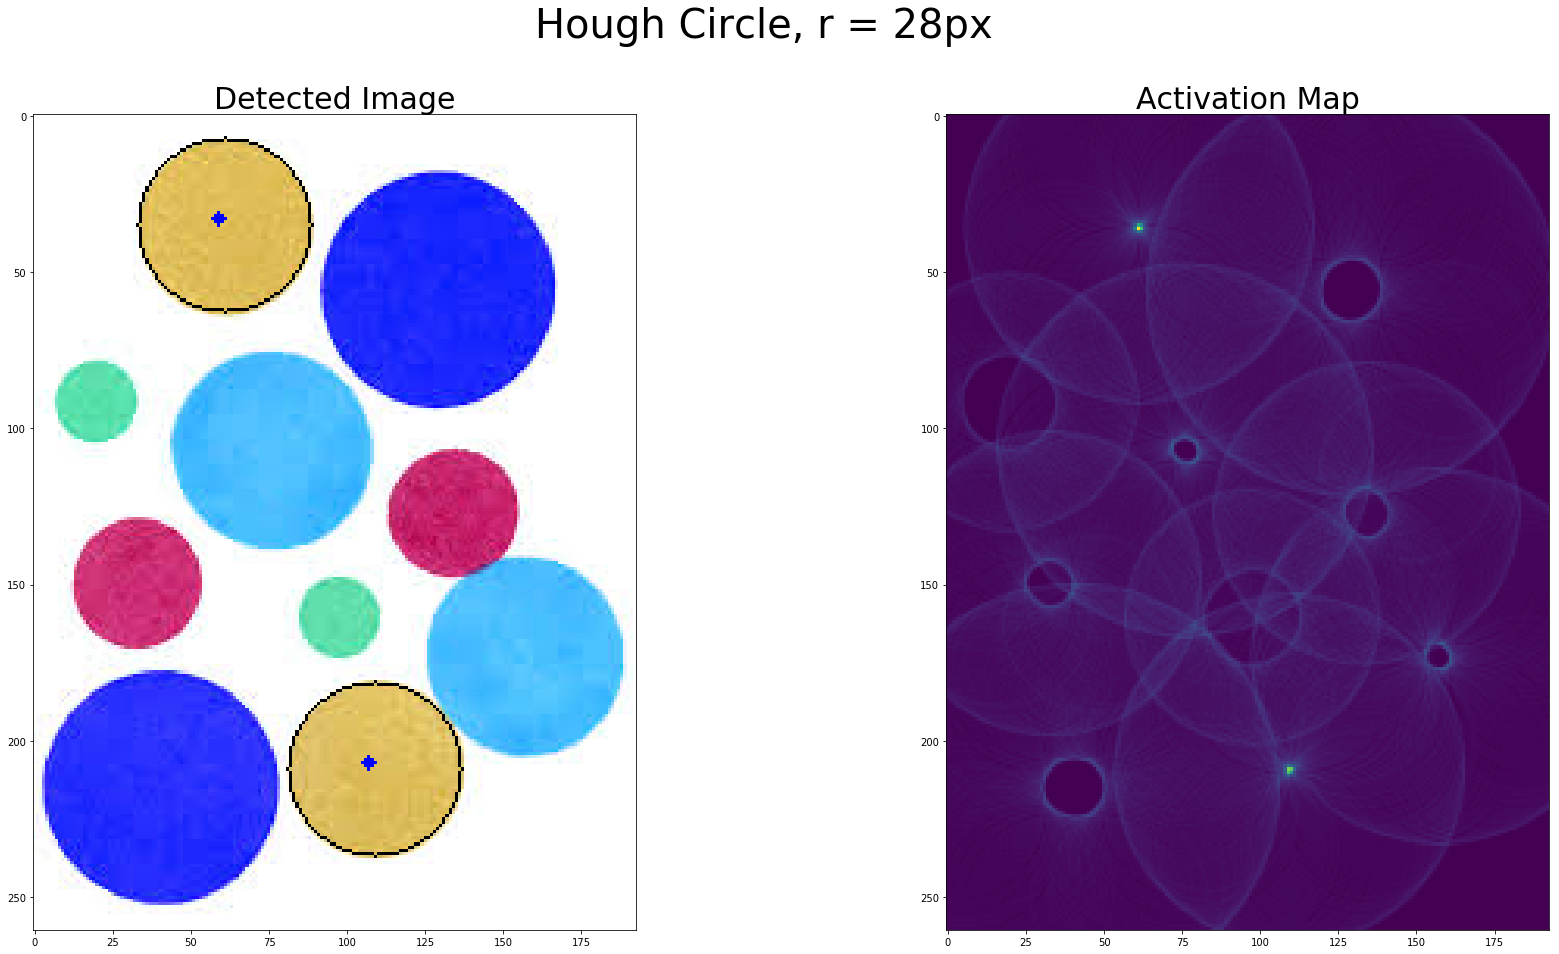

In [67]:
circles, activation = HoughCircles(edged_image,28)  

# Print the output
for vertex in circles:
    cv2.circle(orig_img,(vertex[1],vertex[0]),vertex[2],(0,0,0),1)
    cv2.rectangle(orig_img,(vertex[1]-2,vertex[0]-2),(vertex[1]-2,vertex[0]-2),(0,0,255),3)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Hough Circle, r = 28px', fontsize=40)
ax1.set_title('Detected Image', fontsize=30)
im1 = ax1.imshow(orig_img)
ax2.set_title('Activation Map', fontsize=30)
im2 = ax2.imshow(activation)
plt.show()

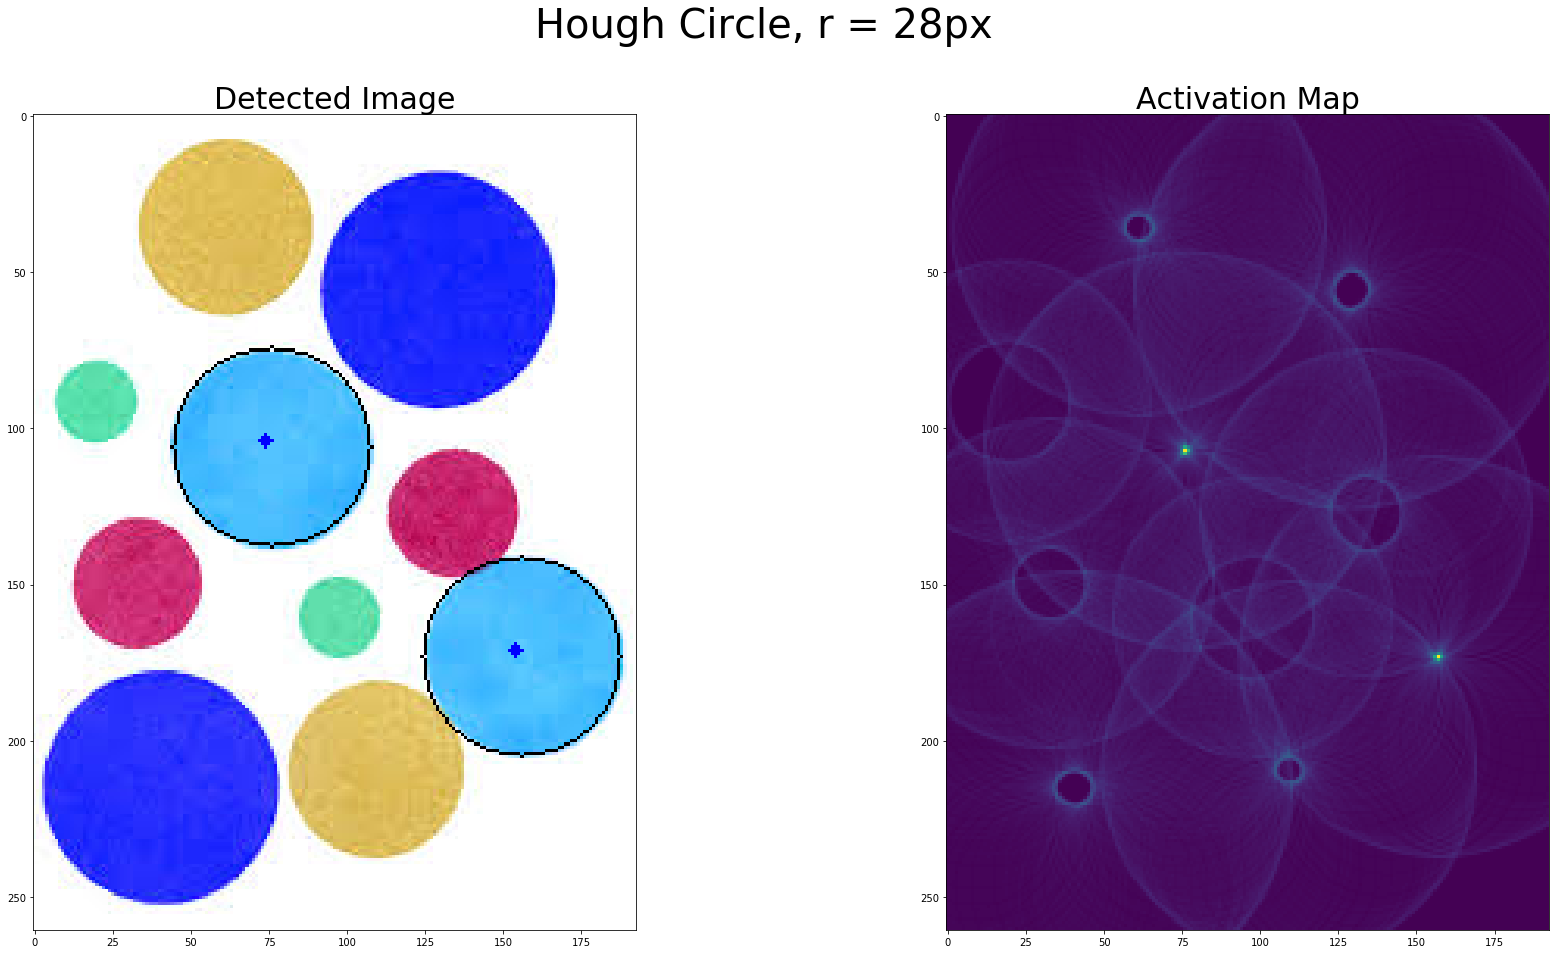

In [71]:
circles, activation = HoughCircles(edged_image,32)  

# Print the output
for vertex in circles:
    cv2.circle(orig_img,(vertex[1],vertex[0]),vertex[2],(0,0,0),1)
    cv2.rectangle(orig_img,(vertex[1]-2,vertex[0]-2),(vertex[1]-2,vertex[0]-2),(0,0,255),3)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Hough Circle, r = 32px', fontsize=40)
ax1.set_title('Detected Image', fontsize=30)
im1 = ax1.imshow(orig_img)
ax2.set_title('Activation Map', fontsize=30)
im2 = ax2.imshow(activation)
plt.show()

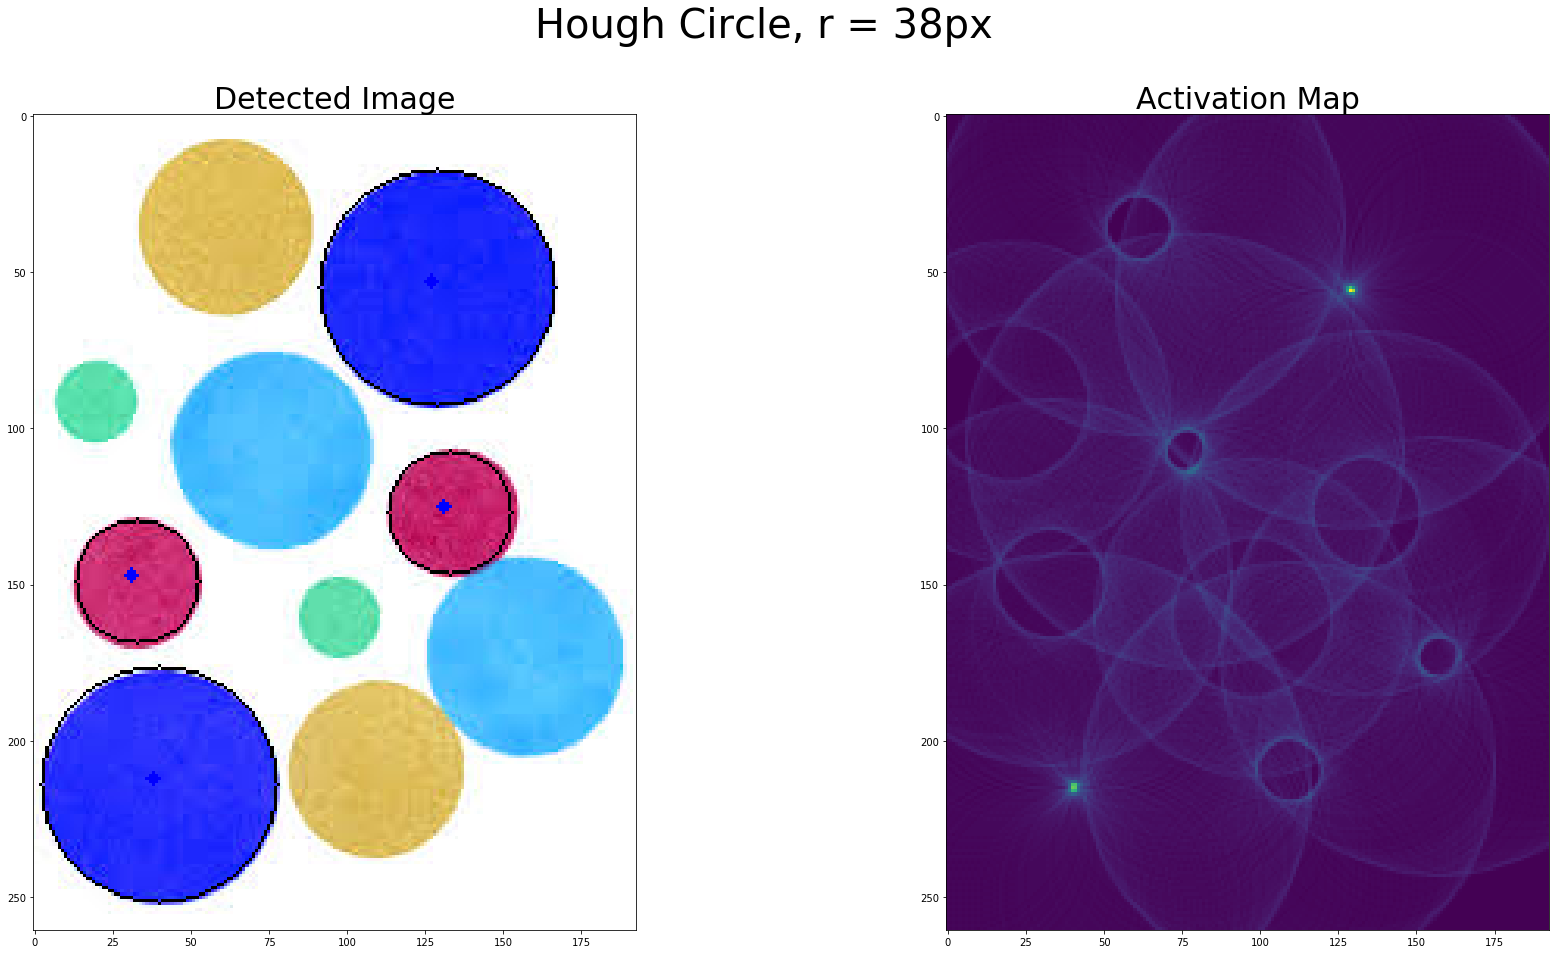

In [60]:
circles, activation = HoughCircles(edged_image,38)  

# Print the output
for vertex in circles:
    cv2.circle(orig_img,(vertex[1],vertex[0]),vertex[2],(0,0,0),1)
    cv2.rectangle(orig_img,(vertex[1]-2,vertex[0]-2),(vertex[1]-2,vertex[0]-2),(0,0,255),3)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Hough Circle, r = 38px', fontsize=40)
ax1.set_title('Detected Image', fontsize=30)
im1 = ax1.imshow(orig_img)
ax2.set_title('Activation Map', fontsize=30)
im2 = ax2.imshow(activation)
plt.show()

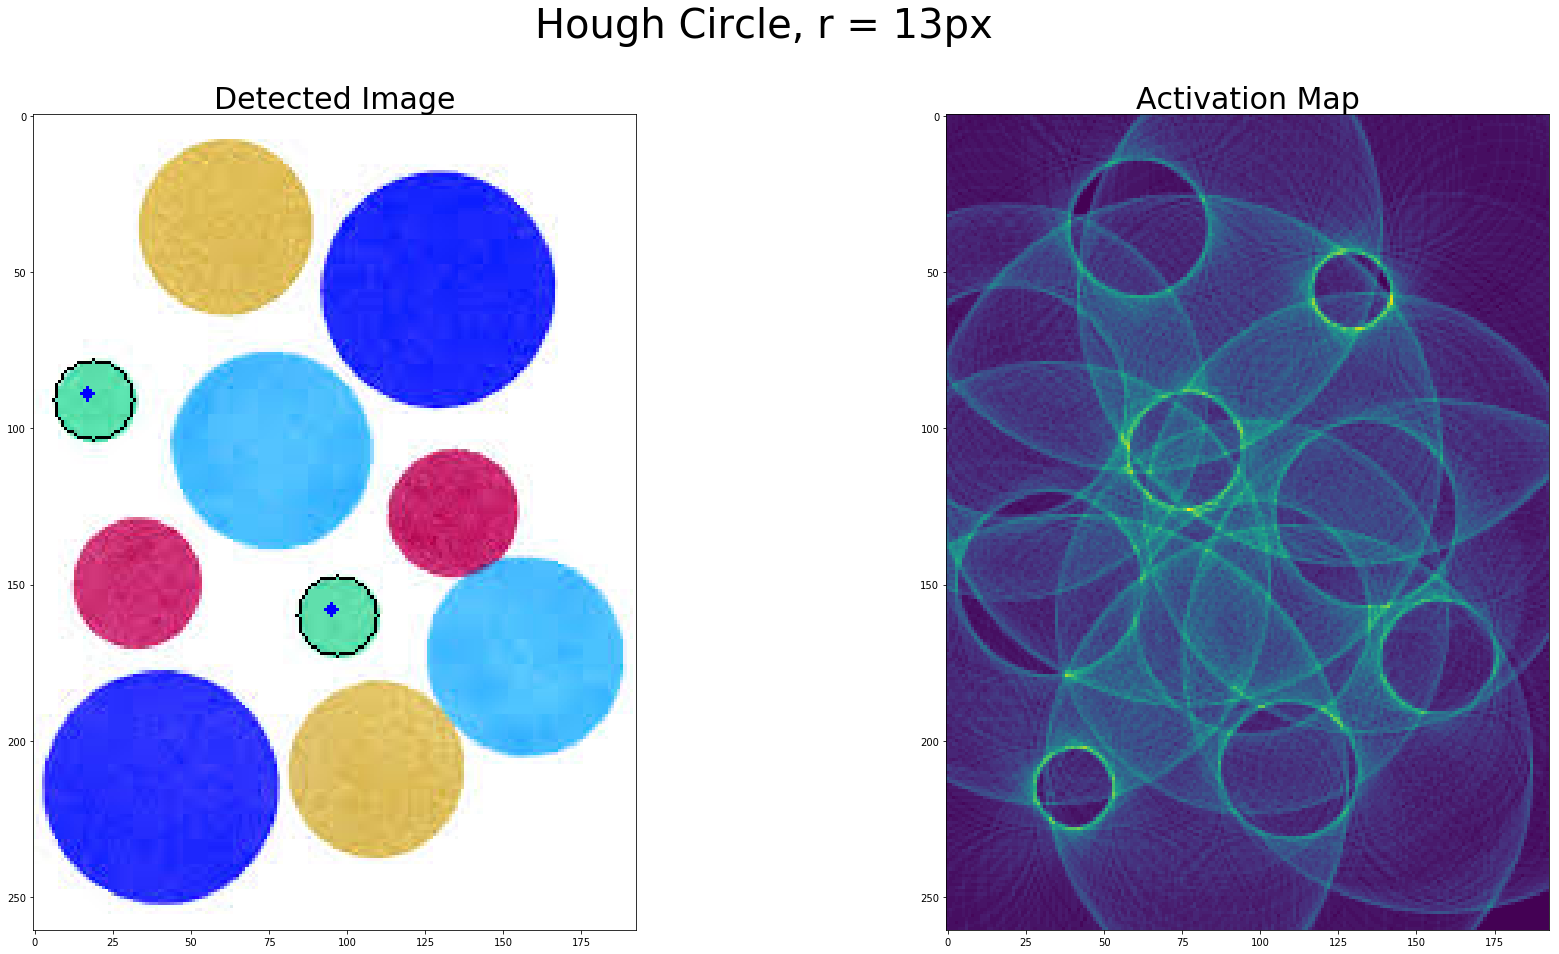

In [8]:
circles, activation = HoughCircles(edged_image,50)  

# Print the output
for vertex in circles:
    cv2.circle(orig_img,(vertex[1],vertex[0]),vertex[2],(0,0,0),1)
    cv2.rectangle(orig_img,(vertex[1]-2,vertex[0]-2),(vertex[1]-2,vertex[0]-2),(0,0,255),3)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Hough Circle, r = 13px', fontsize=40)
ax1.set_title('Detected Image', fontsize=30)
im1 = ax1.imshow(orig_img)
ax2.set_title('Activation Map', fontsize=30)
im2 = ax2.imshow(activation)
plt.show()